#### Balanced and Imbalanced Data

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.
Two approaches to make a balanced dataset out of an imbalanced one are under-sampling and over-sampling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
data=sns.load_dataset('titanic')

In [3]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
data.drop(columns=['deck','embark_town','alive','alone','class','who'],inplace=True)

In [5]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [22]:
data.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
dtype: int64

In [7]:
data.age.fillna(data.age.mean(),inplace=True)

In [8]:
le=LabelEncoder()

In [14]:
data['sex']=le.fit_transform(data['sex'])
data['adult_male']=le.fit_transform(data['adult_male'])
data['embarked']=le.fit_transform(data['embarked'])

In [15]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,0


In [16]:
x=data.iloc[:,1:]

In [17]:
y=data.iloc[:,0]

In [18]:
sc=StandardScaler()

In [19]:
x=sc.fit_transform(x)

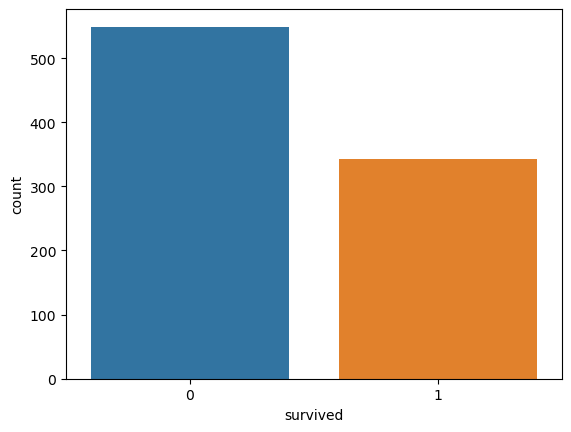

In [21]:
sns.countplot(x=y);

#### Over Sampling

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
oversample=RandomOverSampler()

In [25]:
x_over,y_over=oversample.fit_resample(x,y)

In [26]:
y_over

0       0
1       1
2       1
3       1
4       0
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Name: survived, Length: 1098, dtype: int64

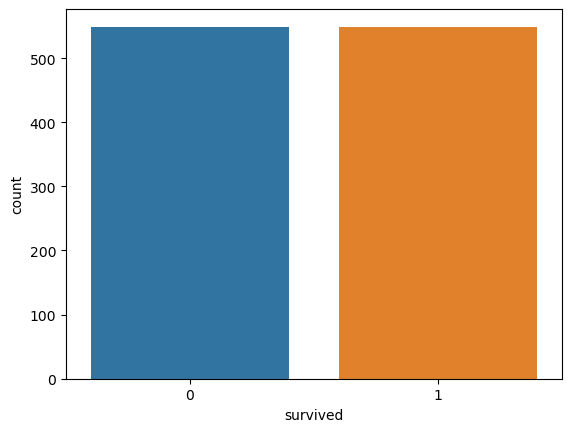

In [27]:
sns.countplot(x=y_over);

#### Under sampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
undersample=RandomUnderSampler()

In [30]:
x_under,y_under=undersample.fit_resample(x,y)

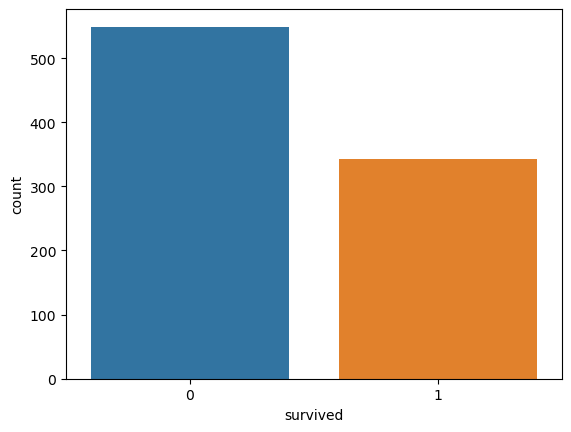

In [31]:
sns.countplot(x=y);

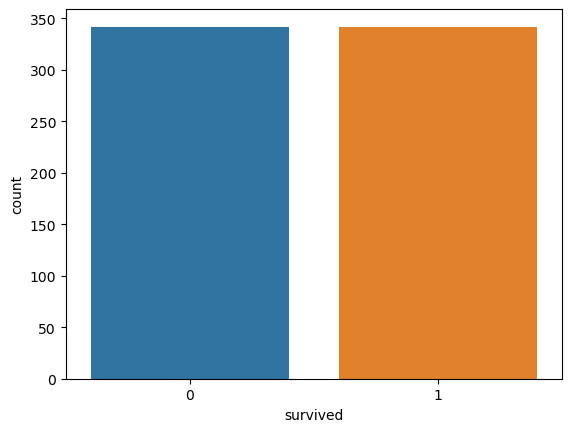

In [32]:
sns.countplot(x=y_under);

#### SMOTE : Synthetic Minority Oversampling Technique and ADASYN: Adaptive Synthetic are 2 methods used in oversampling. These also generate low examples but ADASYN takes into account the density of distribution to distribute the data points evenly. 

In [34]:
#smote

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote=SMOTE()

In [37]:
x_smote,y_smote=smote.fit_resample(x,y)

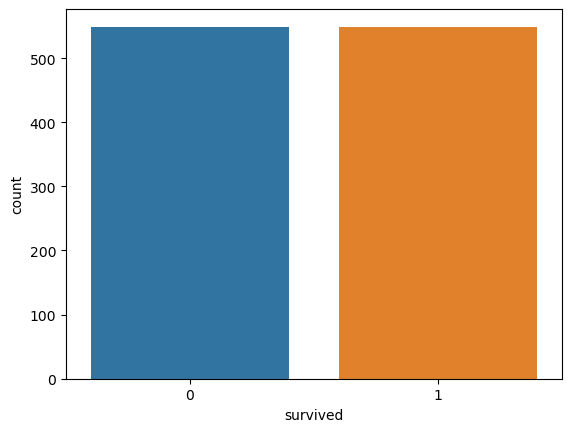

In [38]:
sns.countplot(x=y_smote);

In [39]:
from imblearn.over_sampling import ADASYN

In [40]:
adasyn=ADASYN()

In [41]:
x_ada,y_ada=adasyn.fit_resample(x,y)

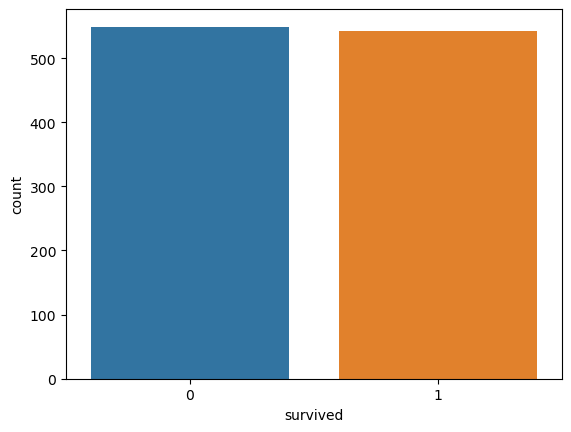

In [42]:
sns.countplot(x=y_ada);